<a href="https://colab.research.google.com/github/janitahaasini/C-100/blob/main/PRO_C115_LOGISTICS_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")

Velocity_list = df["Velocity"].tolist()
Escaped_list = df["Escaped"].tolist()

fig = px.scatter(x=Velocity_list, y=Escaped_list)
fig.show()

In [4]:
import numpy as np
Velocity_array = np.array(Velocity_list)
Escaped_array = np.array(Escaped_list)

#Slope and intercept using pre-built function of Numpy
m, c = np.polyfit(Velocity_array,Escaped_array, 1)

y = []
for x in Velocity_array:
  y_value = m*x + c
  y.append(y_value)

#plotting the graph
fig = px.scatter(x=Velocity_array, y=Escaped_array)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= min(y), y1= max(y),
      x0= min(Velocity_array), x1= max(Velocity_array)
    )
])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



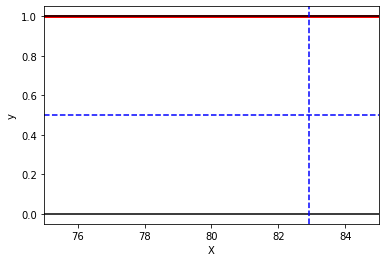

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(Velocity_list, (len(Velocity_list), 1))
Y = np.reshape(Escaped_list, (len(Escaped_list), 1))

lr = LogisticRegression()
lr.fit(X, Y)

plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula 
X_test = np.linspace(0, 100, 200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')

# do hit and trial by changing the value of X_test
plt.axvline(x=X_test[165], color='b', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(75, 85)
plt.show()